In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

In [3]:
housing = pd.read_csv(r'C:\Users\olofs\OneDrive\Skrivbord\Machine_Learning\Lecture_2_house_prices\housing.csv')

In [4]:
housing_2=housing.drop(['ocean_proximity'], axis=1)
housing_2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


<Axes: >

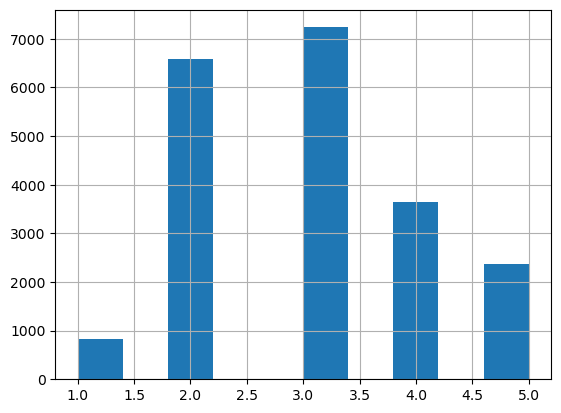

In [5]:
housing_2["income_cat"] = pd.cut(housing_2["median_income"],
    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
    labels=[1, 2, 3, 4, 5])
housing_2["income_cat"].hist()


In [6]:
from sklearn.model_selection import train_test_split
X = housing_2.drop(['median_house_value'], axis=1)
y = housing_2['median_house_value']

X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(X, y, test_size=0.2, random_state=42)

# Check that propotions are right
print(len(X_test_set)/len(housing_2), len(X_train_set)/len(housing_2))
print(len(y_test_set)/len(housing_2), len(y_train_set)/len(housing_2))

 

0.2 0.8
0.2 0.8


In [7]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([
    ("handle_values", SimpleImputer(strategy='mean')),
    ("scaling", StandardScaler()),
    ("forest", RandomForestRegressor())
])




In [8]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV

# param_grid = [{'n_estimators': [2, 5, 10, 100, 150]}]

# forest_reg = RandomForestRegressor(random_state=42)

# grid_search = GridSearchCV(forest_reg, param_grid, cv=3,
#                            scoring='neg_mean_squared_error',
#                            return_train_score=True)

# grid_search.fit(, y_train_set)

In [9]:
pipe.get_params()

{'memory': None,
 'steps': [('handle_values', SimpleImputer()),
  ('scaling', StandardScaler()),
  ('forest', RandomForestRegressor())],
 'verbose': False,
 'handle_values': SimpleImputer(),
 'scaling': StandardScaler(),
 'forest': RandomForestRegressor(),
 'handle_values__add_indicator': False,
 'handle_values__copy': True,
 'handle_values__fill_value': None,
 'handle_values__keep_empty_features': False,
 'handle_values__missing_values': nan,
 'handle_values__strategy': 'mean',
 'handle_values__verbose': 'deprecated',
 'scaling__copy': True,
 'scaling__with_mean': True,
 'scaling__with_std': True,
 'forest__bootstrap': True,
 'forest__ccp_alpha': 0.0,
 'forest__criterion': 'squared_error',
 'forest__max_depth': None,
 'forest__max_features': 1.0,
 'forest__max_leaf_nodes': None,
 'forest__max_samples': None,
 'forest__min_impurity_decrease': 0.0,
 'forest__min_samples_leaf': 1,
 'forest__min_samples_split': 2,
 'forest__min_weight_fraction_leaf': 0.0,
 'forest__n_estimators': 100,
 'f

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# create a range instead of typing each number of estimators
# par_range = np.arange(50, 201, 50)

param_grid = [{'forest__n_estimators': np.arange(50, 251, 50)}]


grid_search = GridSearchCV(pipe, param_grid, cv=3,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)



In [20]:
grid_search.fit(X_train_set, y_train_set)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('handle_values', SimpleImputer()),
                                       ('scaling', StandardScaler()),
                                       ('forest', RandomForestRegressor())]),
             param_grid=[{'forest__n_estimators': array([ 50, 100, 150, 200, 250])}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [21]:
grid_search.best_estimator_

Pipeline(steps=[('handle_values', SimpleImputer()),
                ('scaling', StandardScaler()),
                ('forest', RandomForestRegressor(n_estimators=250))])

In [22]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_forest__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,4.175385,0.088189,0.061512,0.011717,50,{'forest__n_estimators': 50},-2.654952e+09,-2.520901e+09,-2.634011e+09,-2.603288e+09,5.888053e+07,5,-3.931320e+08,-3.876863e+08,-3.822452e+08,-3.876878e+08,4.444518e+06
1,8.612448,0.335615,0.105709,0.001246,100,{'forest__n_estimators': 100},-2.657873e+09,-2.510561e+09,-2.571143e+09,-2.579859e+09,6.045485e+07,4,-3.660661e+08,-3.690329e+08,-3.482694e+08,-3.611228e+08,9.169097e+06
2,12.664021,0.059728,0.162032,0.000034,150,{'forest__n_estimators': 150},-2.606926e+09,-2.498259e+09,-2.569780e+09,-2.558322e+09,4.509707e+07,3,-3.592112e+08,-3.648867e+08,-3.509967e+08,-3.583649e+08,5.702084e+06
3,16.976590,0.220316,0.222549,0.011736,200,{'forest__n_estimators': 200},-2.617265e+09,-2.475246e+09,-2.576607e+09,-2.556373e+09,5.971842e+07,2,-3.573338e+08,-3.572667e+08,-3.484945e+08,-3.543650e+08,4.151183e+06
4,20.920136,0.193960,0.258530,0.006375,250,{'forest__n_estimators': 250},-2.622928e+09,-2.497052e+09,-2.538611e+09,-2.552864e+09,5.236747e+07,1,-3.553497e+08,-3.587866e+08,-3.462608e+08,-3.534657e+08,5.284306e+06


In [23]:
grid_search.score

<bound method BaseSearchCV.score of GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('handle_values', SimpleImputer()),
                                       ('scaling', StandardScaler()),
                                       ('forest', RandomForestRegressor())]),
             param_grid=[{'forest__n_estimators': array([ 50, 100, 150, 200, 250])}],
             return_train_score=True, scoring='neg_mean_squared_error')>

In [24]:
grid_search.best_params_

{'forest__n_estimators': 250}

In [25]:
ypred = grid_search.predict(X_test_set)

In [26]:
print(y_test_set)
print(ypred)

20046     47700.0
3024      45800.0
15663    500001.0
20484    218600.0
9814     278000.0
           ...   
15362    263300.0
16623    266800.0
18086    500001.0
2144      72300.0
3665     151500.0
Name: median_house_value, Length: 4128, dtype: float64
[ 53344.8    68102.    472269.3   ... 498554.176  69752.8   175197.6  ]


In [27]:
mean_squared_error(y_test_set, ypred, squared=False)

49488.75210629005